# Welcome to my new Kernel. 

## I will try a deep understanding of Avito's Dataset.

<i> * English is not my first language, so sorry for any error </i>

## I will try to answer some questions. 
**Some of them is like: **<br>
We have null values in any column?  <br>
Are the price normal distributed? <br>
All ads came from the same category?  <br>
All city's are equal?  <br>
We have a equal distribuition of params? <br>
Which region are most frequent? <br>
The most frequent regions, have the same price and deal probability? <br>
The price and deal probability are correlated?  <br>
Are all features important to we predict the deal probability? <br>

And much more



<i>English is not my first language, so sorry for any error. </i>

In [114]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Importing datasets</h2>

In [115]:
df_train = pd.read_csv("../input/train.csv", parse_dates=["activation_date"])

print("Shape train: ", df_train.shape)

Shape train:  (1503424, 18)


In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null datetime64[ns]
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: datetim

<h2>Looking percentual of null to each column</h2>

In [117]:
is_null = df_train.isnull().sum() / len(df_train) * 100
print("NaN values in train Dataset")
print(is_null[is_null > 0].sort_values(ascending=False))

NaN values in train Dataset
param_3        57.373369
param_2        43.536753
description     7.734079
image_top_1     7.488772
image           7.488772
price           5.677839
param_1         4.095718
dtype: float64


<h2>Visualing the distribuition of the unique values by each feature</h2>

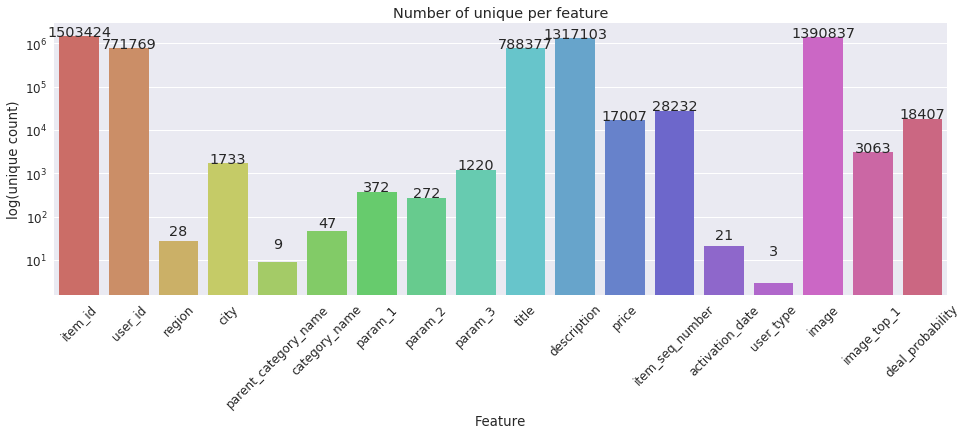

In [118]:
plt.figure(figsize=(16, 5))

cols = df_train.columns

uniques = [len(df_train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette='hls', log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

<h2>Converting some words from russian to English</h2>

In [119]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

params_top35_map = {'Женская одежда':"Women's clothing",
                    'Для девочек':'For girls','Для мальчиков':'For boys','Продам':'Selling','С пробегом':'With mileage',
                    'Аксессуары':'Accessories','Мужская одежда':"Men's Clothing",'Другое':'Other','Игрушки':'Toys',
                    'Детские коляски':'Baby carriages', 'Сдам':'Rent','Ремонт, строительство':'Repair, construction',
                    'Стройматериалы':'Building materials','iPhone':'iPhone','Кровати, диваны и кресла':'Beds, sofas and armchairs',
                    'Инструменты':'Instruments','Для кухни':'For kitchen','Комплектующие':'Accessories','Детская мебель':"Children's furniture",
                    'Шкафы и комоды':'Cabinets and chests of drawers','Приборы и аксессуары':'Devices and accessories','Для дома':'For home',
                    'Транспорт, перевозки':'Transport, transportation','Товары для кормления':'Feeding products','Samsung':'Samsung','Сниму':'Hire',
                    'Книги':'Books','Телевизоры и проекторы':'Televisions and projectors','Велосипеды и самокаты':'Bicycles and scooters',
                    'Предметы интерьера, искусство':'Interior items, art','Другая':'Other','Косметика':'Cosmetics',
                    'Постельные принадлежности':'Bed dress','С/х животные' :'Farm animals','Столы и стулья':'Tables and chairs'}

In [120]:
df_train['region_en'] = df_train['region'].apply(lambda x : region_map[x])
df_train['parent_category_name_en'] = df_train['parent_category_name'].apply(lambda x : parent_category_name_map[x])
df_train['category_name_en'] = df_train['category_name'].apply(lambda x : category_map[x])

del df_train['region']
del df_train['parent_category_name']
del df_train['category_name']

<h2>Let's look how the data appears</h2>

In [121]:
df_train.head()

,item_id,user_id,city,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,region_en,parent_category_name_en,category_name_en
0,b912c3c6a6ad,e00f8ff2eaf9,Екатеринбург,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,Sverdlovsk oblast,Personal belongings,Children's products and toys
1,2dac0150717d,39aeb48f0017,Самара,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,Samara oblast,For the home and garden,Furniture and interior
2,ba83aefab5dc,91e2f88dd6e3,Ростов-на-Дону,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,Rostov oblast,Consumer electronics,Audio and video
3,02996f1dd2ea,bf5cccea572d,Набережные Челны,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,Tatarstan,Personal belongings,Children's products and toys
4,7c90be56d2ab,ef50846afc0b,Волгоград,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,Volgograd oblast,Transport,Cars


Let's start exploring the distribuition of price and deal probability that will be one of the most important elements to guide our exploration

<h2>I will start taking a look at  the Deal Probability that is the target feature </h2>

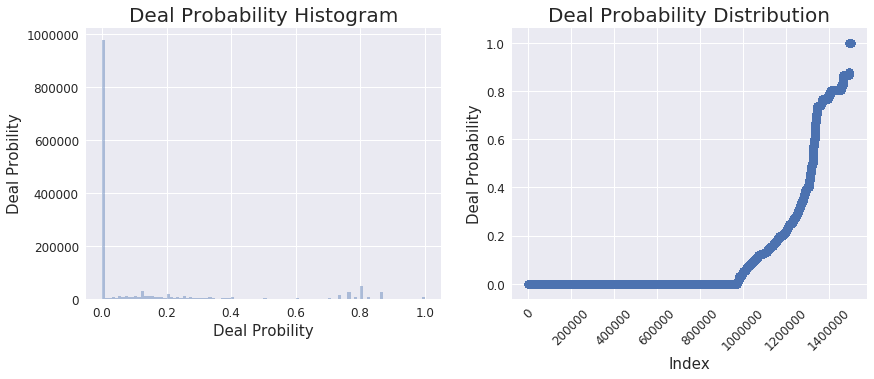

In [122]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
ax = sns.distplot(df_train["deal_probability"].values, bins=100, kde=False)
ax.set_xlabel('Deal Probility', fontsize=15)
ax.set_ylabel('Deal Probility', fontsize=15)
ax.set_title("Deal Probability Histogram", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(range(df_train.shape[0]), np.sort(df_train['deal_probability'].values))
plt.xlabel('Index', fontsize=15)
plt.ylabel('Deal Probability', fontsize=15)
plt.title("Deal Probability Distribution", fontsize=20)
plt.xticks(rotation=45)
plt.show()


To a better understanding of the  dataset and a further exploration, I will create a new feature that will be the deal probability categorical. 


<h2>Seting the deal probability categorical</h2>

In [123]:
interval = (-0.99, .02, .05, .1, .15, .2, .35, .50, .70,.85,2)
cats = ['0 -.02%', '.02%-.05%', '.05-.10', '.10-.15', '.15-.20', '.20-.35', '.35-.50', '.50-.70', '.70-.85','.85+']

df_train["deal_prob_cat"] = pd.cut(df_train.deal_probability, interval, labels=cats)

<h2>Now, let's do a count of this categorical feature to see the distribuition of each value </h2>

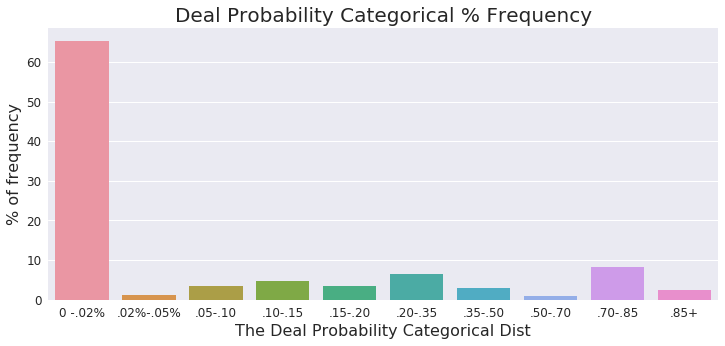

In [124]:
prob_cat_percent = df_train["deal_prob_cat"].value_counts() / len(df_train['deal_probability'])* 100

plt.figure(figsize=(12,5))
g = sns.barplot(prob_cat_percent.index, prob_cat_percent.values)
g.set_xlabel('The Deal Probability Categorical Dist',fontsize=16)
g.set_ylabel('% of frequency',fontsize=16)
g.set_title('Deal Probability Categorical % Frequency',fontsize= 20)
plt.show()

We can see that that more than 65% of our target have from zero to .02%of Deal Probability

<h2>Deal Probability x Price Log Distribuition </h2>

Now, let's use the categorical probability to verify if the price have the same behavior to each value in our categories'

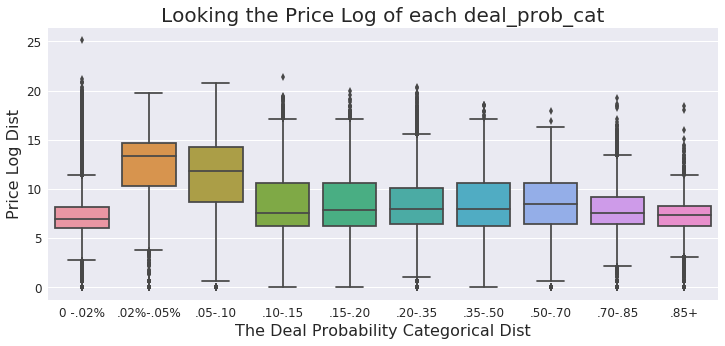

In [125]:
df_train['price_log'] = np.log(df_train['price'] + 1)

plt.figure(figsize=(12,5))

g = sns.boxplot(x='deal_prob_cat', y='price_log', data=df_train)
g.set_xlabel('The Deal Probability Categorical Dist',fontsize=16)
g.set_ylabel('Price Log Dist',fontsize=16)
g.set_title('Looking the Price Log of each deal_prob_cat',fontsize= 20)

plt.show()

We can see an interesting behavior of price on the lowest deal probabilities category that is different of another two lowest values. Also, we can clearly see that low probabilities have a lowest prices and is the most frequent deal probability interval in the dataset.  Later we will explore this further.

<h2>Let's take a first look at Price Feature</h2>

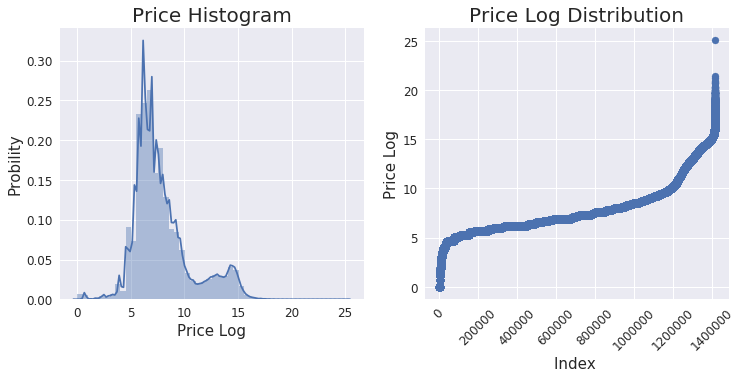

In [126]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
g = sns.distplot(np.log(df_train['price'].dropna() + 1))
g.set_xlabel('Price Log', fontsize=15)
g.set_ylabel('Probility', fontsize=15)
g.set_title("Price Histogram", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(range(df_train.shape[0]), np.sort(np.log(df_train['price']+1).values))
plt.xlabel('Index ', fontsize=15)
plt.ylabel('Price Log', fontsize=15)
plt.title("Price Log Distribution", fontsize=20)
plt.xticks(rotation=45)
plt.show()

plt.show()

We can see that a great part of our data is under 10 Price log 

<h2>Taking a look at user type feature</h2>

User Type % Proportion
Private    71.55
Company    23.10
Shop        5.35
Name: user_type, dtype: float64


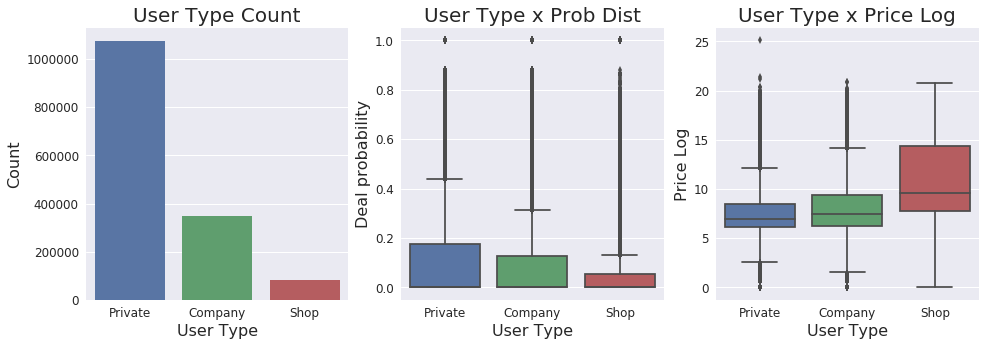

In [127]:
print("User Type % Proportion")
print(round(df_train['user_type'].value_counts() / len(df_train) * 100, 2))

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
g = sns.countplot(x='user_type', data=df_train, )
g.set_xlabel('User Type',fontsize=16)
g.set_ylabel('Count',fontsize=16)
g.set_title('User Type Count',fontsize= 20)

plt.subplot(1,3,2)
g1 = sns.boxplot(x='user_type', y='deal_probability', data=df_train)
g1.set_xlabel('User Type',fontsize=16)
g1.set_ylabel('Deal probability',fontsize=16)
g1.set_title('User Type x Prob Dist',fontsize= 20)

plt.subplot(1,3,3)
g1 = sns.boxplot(x='user_type', y='price_log', data=df_train)
g1.set_xlabel('User Type',fontsize=16)
g1.set_ylabel('Price Log',fontsize=16)
g1.set_title('User Type x Price Log',fontsize= 20)

plt.show()

Highest frequent user type  in Ad is Privat. And it also have a high Deal Probability and lowest price values. 

**Let's start our powerful Heat table, using deal prob cat and user_type**

In [128]:
cols = ['user_type','deal_prob_cat']
colmap = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[cols[0]], df_train[cols[1]]).style.background_gradient(cmap = colmap)

deal_prob_cat,0 -.02%,.02%-.05%,.05-.10,.10-.15,.15-.20,.20-.35,.35-.50,.50-.70,.70-.85,.85+
user_type,,,,,,,,,,
Company,232397,5896,14475,15402,11893,21517,9685,3334,25881,6769
Private,695475,8326,30943,52694,39867,74819,34684,11028,98191,29679
Shop,53414,5552,8283,4050,2238,3139,921,348,2106,418


Intetresting value distribuition...  We have a highest 

<h2>Parent Category Name Feature: </h2>
- Count
- Crossed with deal prob
- Crossed with price

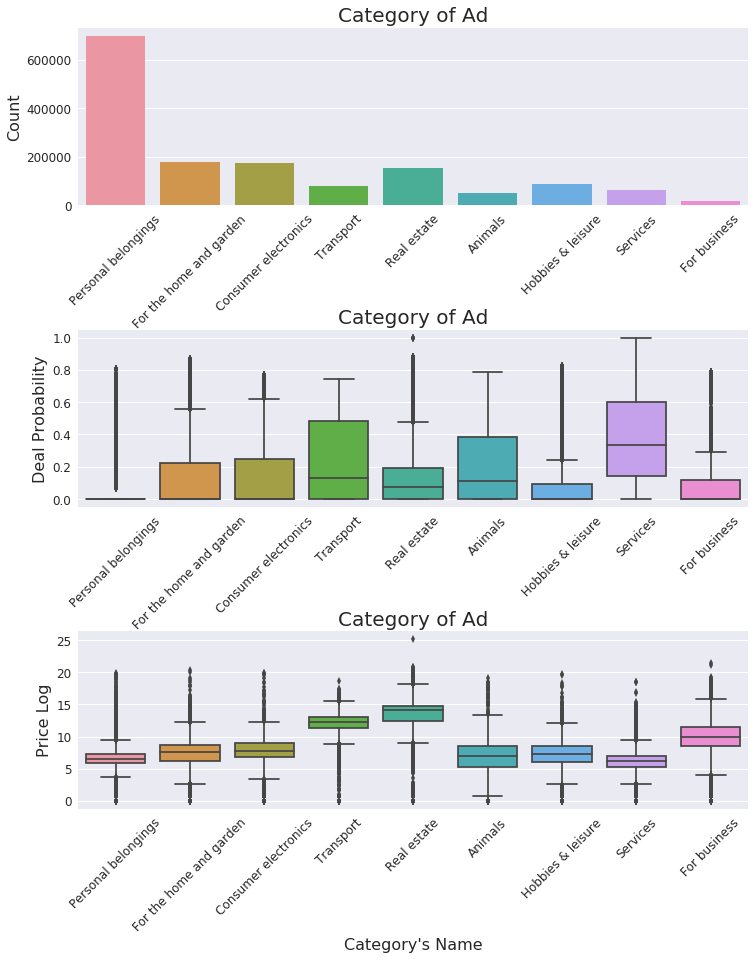

In [129]:
plt.figure(figsize=(12,14))

plt.subplot(3,1,1)
g = sns.countplot(x='parent_category_name_en', data=df_train)
g.set_xlabel('User Type',fontsize=16)
g.set_ylabel('Count',fontsize=16)
g.set_title('Category of Ad',fontsize= 20)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(x='parent_category_name_en',y='deal_probability', data=df_train)
g1.set_xlabel("Category's Name",fontsize=16)
g1.set_ylabel('Deal Probability',fontsize=16)
g1.set_title('Category of Ad',fontsize= 20)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(x='parent_category_name_en', y='price_log', data=df_train)
g2.set_xlabel("Category's Name",fontsize=16)
g2.set_ylabel('Price Log',fontsize=16)
g2.set_title('Category of Ad',fontsize= 20)
g2.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

Let's use our new features to understand better the distribuition of each category'

In [130]:
cols = ['parent_category_name_en','deal_prob_cat']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[cols[0]], df_train[cols[1]]).style.background_gradient(cmap = cm)

deal_prob_cat,0 -.02%,.02%-.05%,.05-.10,.10-.15,.15-.20,.20-.35,.35-.50,.50-.70,.70-.85,.85+
parent_category_name_en,,,,,,,,,,
Animals,22262,659,2458,2895,2374,6943,5484,328,9067,0
Consumer electronics,101260,2000,8510,6221,7100,16633,2632,1027,27625,0
For business,10037,1761,1527,903,967,1137,175,173,1395,0
For the home and garden,112910,197,4921,8591,4524,12885,7298,662,846,25989
Hobbies & leisure,63050,226,1532,2490,2946,5231,923,336,9277,0
Personal belongings,576488,0,3119,29800,11754,22579,4057,1627,48199,0
Real estate,51217,11572,26768,15374,11033,19285,6781,3888,6590,682
Services,15235,0,0,1448,9742,6418,11139,4755,5453,10195
Transport,28827,3359,4866,4424,3558,8364,6801,1914,17726,0


Very interesting and meaningful crosstab.

<h2>Region Feature</h2>
- Count
- Crossed with deal prob
- Crossed with price

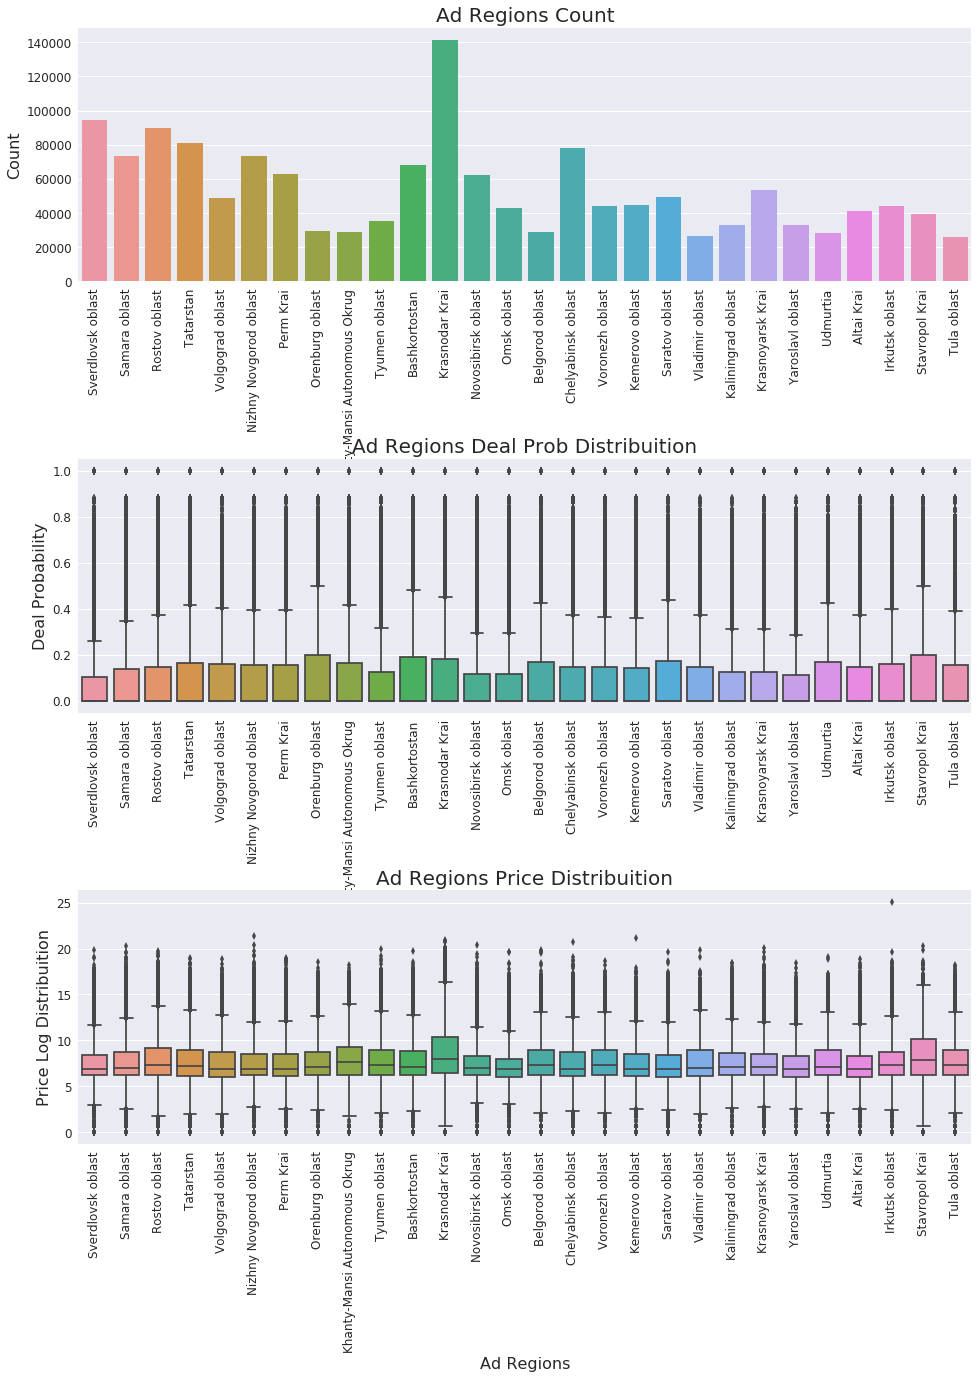

In [131]:
plt.figure(figsize=(16,20))
plt.subplot(3,1,1)
g = sns.countplot(x='region_en', data=df_train)
g.set_xlabel('Ad Regions',fontsize=16)
g.set_ylabel('Count',fontsize=16)
g.set_title('Ad Regions Count',fontsize= 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(3,1,2)
g1 = sns.boxplot(x='region_en', y='deal_probability',data=df_train, orient='')
g1.set_xlabel('Ad Regions',fontsize=16)
g1.set_ylabel('Deal Probability',fontsize=16)
g1.set_title('Ad Regions Deal Prob Distribuition',fontsize= 20)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)

plt.subplot(3,1,3)
g2 = sns.boxplot(x='region_en', y='price_log',data=df_train, orient='')
g2.set_xlabel('Ad Regions',fontsize=16)
g2.set_ylabel('Price Log Distribuition',fontsize=16)
g2.set_title('Ad Regions Price Distribuition',fontsize= 20)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

We can see a city with the clear highest frequency, but almost all cities with the same price statistics

<h3>Let's take a look at our crosstab with region and deal prob categorys'</h3>

In [132]:
cols = ['region_en','deal_prob_cat']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[cols[0]], df_train[cols[1]]).style.background_gradient(cmap = cm)

deal_prob_cat,0 -.02%,.02%-.05%,.05-.10,.10-.15,.15-.20,.20-.35,.35-.50,.50-.70,.70-.85,.85+
region_en,,,,,,,,,,
Altai Krai,27232,395,1418,2273,1447,2885,1150,327,3370,1023
Bashkortostan,42618,729,2181,3474,2876,5573,2659,795,5644,1742
Belgorod oblast,18529,300,991,1383,1031,2030,1119,329,2400,756
Chelyabinsk oblast,51078,1054,2912,3743,2668,4775,2146,696,7394,1873
Irkutsk oblast,27785,487,1806,2546,1698,3485,1296,430,3413,1084
Kaliningrad oblast,22893,253,899,1414,948,1643,730,251,3013,712
Kemerovo oblast,29474,490,1479,2188,1696,3000,1174,366,3761,1007
Khanty-Mansi Autonomous Okrug,18130,417,1093,1467,1180,2138,889,302,2179,914
Krasnodar Krai,83910,4141,7176,7360,6267,10687,5433,1799,10561,4082


  ## Taking Advantage, let's take quick look at city feature


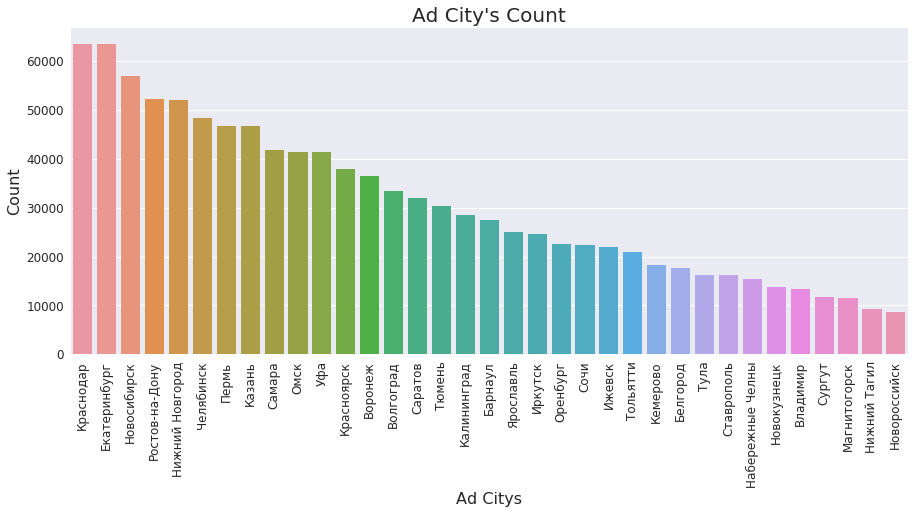

In [133]:
city_count = df_train['city'].value_counts()

plt.figure(figsize=(15,6))

g = sns.barplot(city_count.index[:35],city_count.values[:35])
g.set_xlabel('Ad Citys',fontsize=16)
g.set_ylabel('Count',fontsize=16)
g.set_title("Ad City's Count",fontsize= 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

In [134]:
cities_top_35 = ['Краснодар', 'Екатеринбург', 'Новосибирск', 'Ростов-на-Дону',
       'Нижний Новгород', 'Челябинск', 'Пермь', 'Казань', 'Самара', 'Омск',
       'Уфа', 'Красноярск', 'Воронеж', 'Волгоград', 'Саратов', 'Тюмень',
       'Калининград', 'Барнаул', 'Ярославль', 'Иркутск', 'Оренбург', 'Сочи',
       'Ижевск', 'Тольятти', 'Кемерово', 'Белгород', 'Тула', 'Ставрополь',
       'Набережные Челны', 'Новокузнецк', 'Владимир', 'Сургут', 'Магнитогорск',
       'Нижний Тагил', 'Новороссийск']

## Let's take a look at the distribuition of Deal Probability and Price of the top 35 Cities

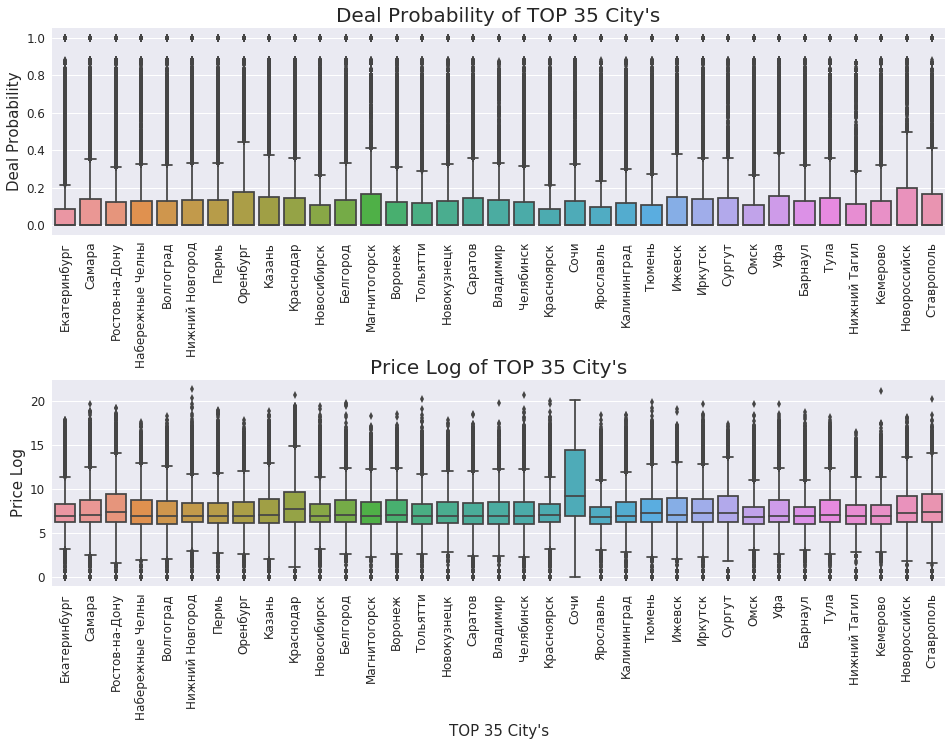

In [135]:
plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
g = sns.boxplot(x='city', y='deal_probability', data=df_train[df_train.city.isin(cities_top_35)])
g.set_xlabel("", fontsize=15)
g.set_ylabel("Deal Probability", fontsize=15)
g.set_title("Deal Probability of TOP 35 City's", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='city', y='price_log', data=df_train[df_train.city.isin(cities_top_35)])
g1.set_xlabel("TOP 35 City's", fontsize=15)
g1.set_ylabel("Price Log", fontsize=15)
g1.set_title("Price Log of TOP 35 City's", fontsize=20)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

We can see that just on city have a different pattern at pricces, but in deal probability we can consider a normal distribuition


<h2> Category name distribuitions </h2>

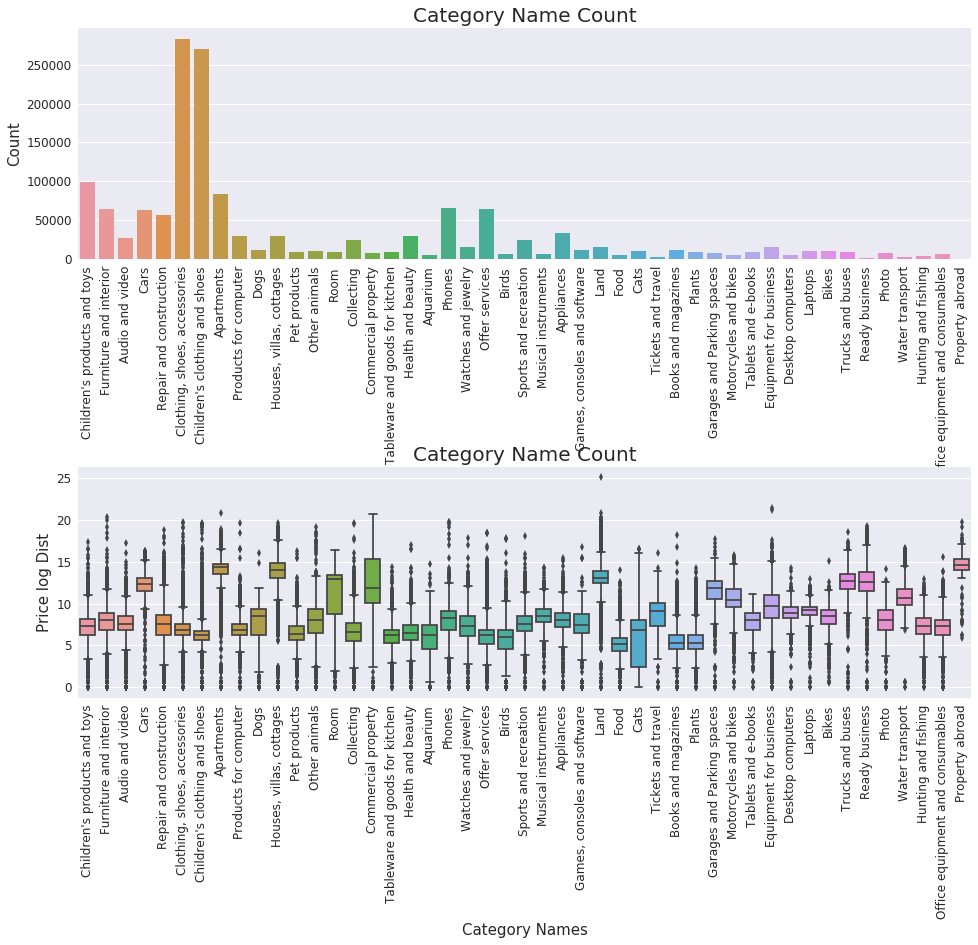

In [136]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.countplot(x='category_name_en', data=df_train)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel('Category Names', fontsize=15)
g.set_ylabel('Count', fontsize=15)
g.set_title('Category Name Count', fontsize=20)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='category_name_en', y='price_log', data=df_train)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_xlabel('Category Names', fontsize=15)
g1.set_ylabel('Price log Dist', fontsize=15)
g1.set_title('Category Name Count', fontsize=20)

plt.subplots_adjust(hspace = 0.9,top = 0.9)

plt.show()

We can see that land, apartments, houses, cars and trucks have a highest mean price. I will verify the deal prob using the categorical feature

<h3>Lets take a look at the heat table of categorical deal prob and category names</h3>


In [137]:
cols = ['category_name_en','deal_prob_cat']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[cols[0]], df_train[cols[1]]).style.background_gradient(cmap = cm)

deal_prob_cat,0 -.02%,.02%-.05%,.05-.10,.10-.15,.15-.20,.20-.35,.35-.50,.50-.70,.70-.85,.85+
category_name_en,,,,,,,,,,
Apartments,25640,7358,14313,7698,5760,10911,4273,2611,4654,452
Appliances,18734,0,1636,785,932,2061,1391,166,225,7775
Aquarium,2855,0,46,339,130,421,285,25,739,0
Audio and video,16914,0,1034,967,960,2187,397,184,4393,0
Bikes,5867,169,331,315,248,762,250,94,2602,0
Birds,2614,0,67,445,148,1062,1270,27,814,0
Books and magazines,10587,0,0,0,552,299,45,14,322,0
Cars,21412,2444,3778,3602,2752,6571,5353,1429,15153,0
Cats,3182,2,859,432,638,1388,917,53,2480,0


very Interesting and meaningful heat table. I will create a subset of the principal values

## Now we will know take a look at param_1 feature

In [138]:
params = df_train.param_1.value_counts().head(35)

params.index = ["Women's Clothing", 'For Girls', 'For Boys', 'Selling',
                'With mileage', 'Accessories', "Men's clothing", 'Other', 'Toys',
                'Baby carriages', 'Rent', 'Repair, construction', 'Building materials',
                'iPhone', 'Beds, sofas and armchairs', 'Tools', 'For the kitchen',
                'Accessories', "Children's Furniture", 'Cabinets and Chests', 
                'Devices and accessories', 'For the house', 'Transport, transportation',
                'Nursing Items', 'Samsung', 'Hire', 'Books',
                'TVs and projectors', 'Bicycles and scooters',
                'Interior items, art', 'Other', 'Cosmetics',
                'Bedding', 'Farm animals', 'Tables and chairs']

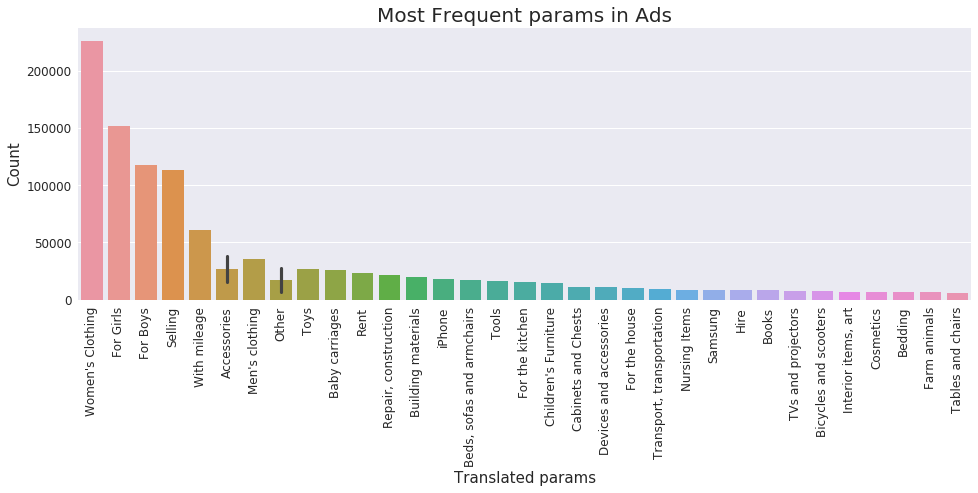

In [139]:
plt.figure(figsize=(16,5))

g = sns.barplot(x=params.index, y=params.values)
g.set_xlabel("Translated params", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Most Frequent params in Ads", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

Wow, it's very insightful. 
It's very clear to see that womens, "for girls",  "for boys" and "selling" have the highest % of params.<br>
Let's take a look how representative is the top 5 values

In [140]:
print("The top five Ad params in %")
print(round((params / len(df_train) * 100).head(n=5),2))

The top five Ad params in %
Women's Clothing    15.05
For Girls           10.11
For Boys             7.83
Selling              7.57
With mileage         4.06
Name: param_1, dtype: float64


This top 5 values represents 44.62% of total all showed values. Later I will explore this further.

### I will try understand the top 35 most frequent values in param_1

- This 35 values represents 74.37% of total data frequency

In [141]:
# I used the google translate to translate this all words in params
russian_param_names = ["Женская одежда","Для девочек","Для мальчиков","Продам", "С пробегом","Аксессуары",
"Мужская одежда","Другое","Игрушки","Детские коляски","Сдам","Ремонт, строительство","Стройматериалы",
"iPhone","Кровати, диваны и кресла","Инструменты","Для кухни","Комплектующие","Детская мебель","Шкафы и комоды",
"Приборы и аксессуары","Для дома","Транспорт, перевозки","Товары для кормления","Samsung","Сниму",
"Книги","Телевизоры и проекторы","Велосипеды и самокаты","Предметы интерьера, искусство","Другая",
"Косметика","Постельные принадлежности","С/х животные","Столы и стулья"]

subset_param = df_train[df_train.param_1.isin(russian_param_names)]

subset_param['param_en'] = subset_param['param_1'].apply(lambda x : params_top35_map[x])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


## Visualing the top 35 param_1 values by Prices and deal probability

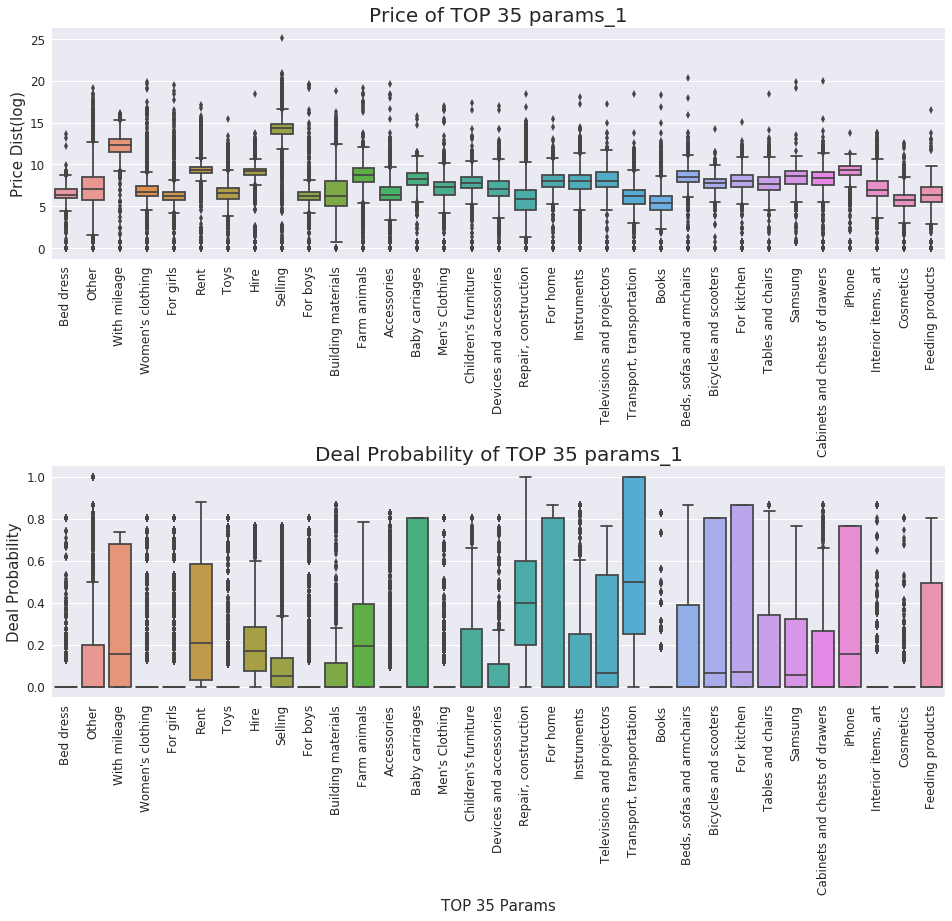

In [142]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
g = sns.boxplot(x='param_en', y='price_log', data=subset_param)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Price Dist(log)", fontsize=15)
g.set_title("Price of TOP 35 params_1", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='param_en', y='deal_probability', data=subset_param)
g1.set_xlabel("TOP 35 Params", fontsize=15)
g1.set_ylabel("Deal Probability", fontsize=15)
g1.set_title("Deal Probability of TOP 35 params_1", fontsize=20)
g1.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.9,top = 0.9)

plt.show()

Very interesting values in dataset, we can verify that some params have diffferences in price and deal probability  feature. It's a very meaningful graphic.

# Let's take a look at a Crosstab function that help to understand our target

In [143]:
cols = ['param_en','deal_prob_cat']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(subset_param[cols[0]], subset_param[cols[1]]).style.background_gradient(cmap = cm)

deal_prob_cat,0 -.02%,.02%-.05%,.05-.10,.10-.15,.15-.20,.20-.35,.35-.50,.50-.70,.70-.85,.85+
param_en,,,,,,,,,,
Accessories,42178,0,600,1346,1693,2607,493,146,4590,0
Baby carriages,14404,0,1489,655,648,1607,301,157,6987,0
Bed dress,5304,0,0,293,116,264,60,23,536,0
"Beds, sofas and armchairs",8777,0,1432,585,656,1221,672,89,114,3873
Bicycles and scooters,3467,0,344,148,170,452,127,89,2398,0
Books,7146,0,0,0,418,214,33,7,263,0
Building materials,14401,0,0,1564,0,2033,1033,36,59,1071
Cabinets and chests of drawers,6741,0,689,314,526,743,361,45,49,1949
Children's furniture,8606,0,592,465,407,823,155,113,3090,0


## Let's take a look at the Activation Date' - How we have a little number of dates, I will extract just the day.

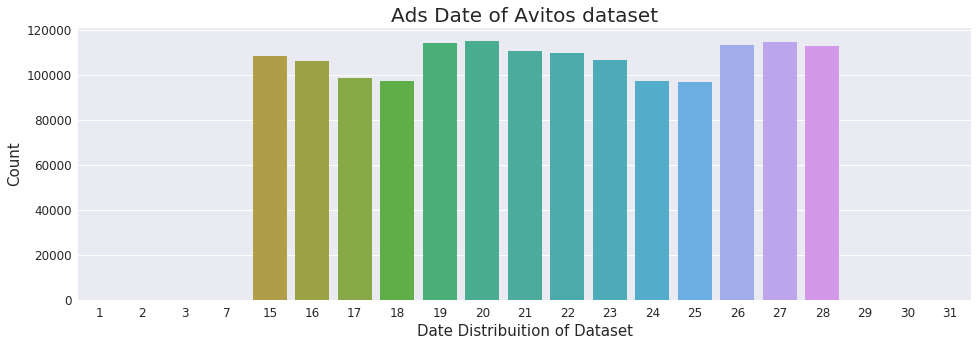

In [144]:
df_train['day'] = df_train['activation_date'].dt.day

time_count = df_train['day'].value_counts()

plt.figure(figsize=(16,5))

g = sns.barplot(time_count.index, time_count.values)
g.set_xlabel("Date Distribuition of Dataset", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Ads Date of Avitos dataset", fontsize=20)

plt.show()

Let's try see the probs by day

In [145]:
cols = ['day','deal_prob_cat']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[cols[0]], df_train[cols[1]]).style.background_gradient(cmap = cm)

deal_prob_cat,0 -.02%,.02%-.05%,.05-.10,.10-.15,.15-.20,.20-.35,.35-.50,.50-.70,.70-.85,.85+
day,,,,,,,,,,
1,0,0,0,0,0,0,0,0,3,0
2,2,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0
15,70422,1004,4162,5371,4035,7495,3345,1108,9072,2601
16,68565,1169,3921,5313,3992,7348,3263,1004,9086,2507
17,63615,1211,3847,4862,3704,6674,3068,976,8520,2296
18,64464,1034,3057,4631,3323,6375,2789,901,8501,2479
19,77035,986,3348,5165,3808,7064,3205,1053,9918,2834


Might we would not consider this feature to this job, but after we can do a measure of his importance

## Let's do some new feature engineering with the title and description feature
- importing some necessary librarys

In [146]:
#nlp
import string
import re    #for any necessary regex
import nltk
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

Now, let's do it


In [147]:
#Word count in each comment:
df_train['count_word'] = df_train["title"].apply(lambda x: len(str(x).split()))
df_train['count_word_desc'] = df_train["description"].apply(lambda x: len(str(x).split()))

#Unique word count
df_train['count_unique_word'] = df_train["title"].apply(lambda x: len(set(str(x).split())))
df_train['count_unique_word_desc']= df_train["description"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_train['count_letters'] = df_train["title"].apply(lambda x: len(str(x)))
df_train['count_letters_desc']= df_train["description"].apply(lambda x: len(str(x)))

#punctuation count
df_train["count_punctuations"] = df_train["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_train["count_punctuations_desc"] = df_train["description"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_train["count_words_upper"] = df_train["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_train["count_words_upper_desc"] = df_train["description"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_train["count_words_title"] = df_train["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_train["count_words_title_desc"] = df_train["description"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Average length of the words
df_train["mean_word_len"] = df_train["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_train["mean_word_len_desc"] = df_train["description"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

### Plot the distribuition of our new features

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


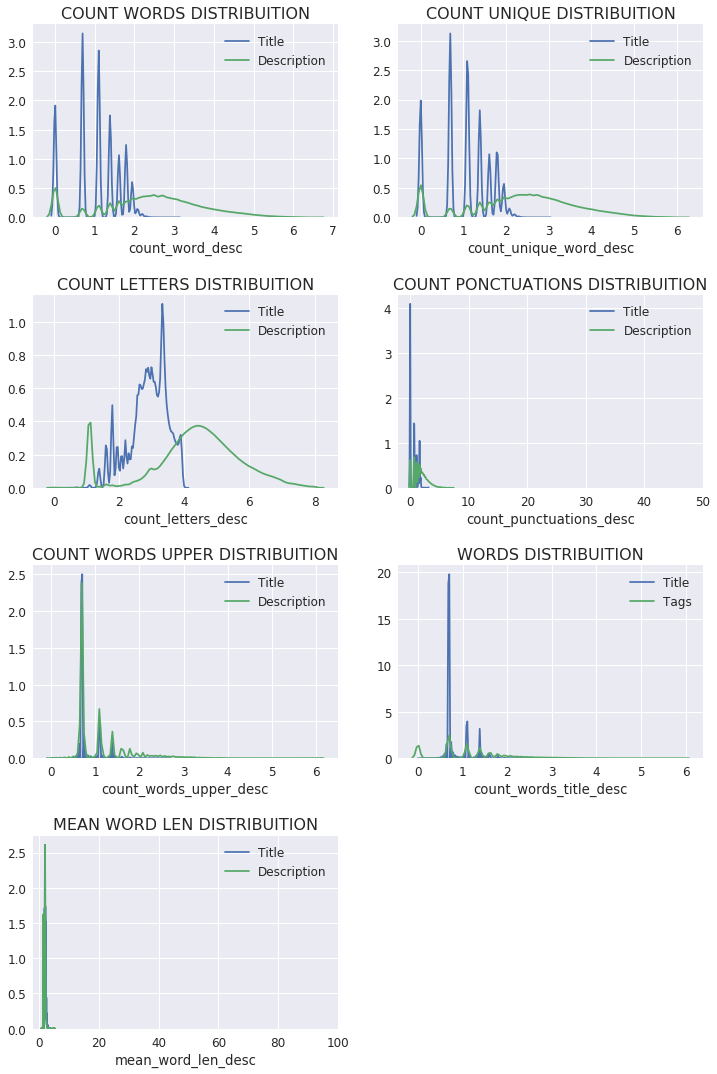

In [148]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(np.log(df_train['count_word']), 
                  hist=False, label='Title')
g1 = sns.distplot(np.log(df_train['count_word_desc']), 
                  hist=False, label='Description')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(np.log(df_train['count_unique_word']),
                  hist=False, label='Title')
g2 = sns.distplot(np.log(df_train['count_unique_word_desc']), 
                  hist=False, label='Description')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(np.log(df_train['count_letters']), 
                  hist=False, label='Title')
g3 = sns.distplot(np.log(df_train['count_letters_desc']), 
                  hist=False, label='Description')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(np.log(df_train["count_punctuations"]), 
                  hist=False, label='Title')
g4 = sns.distplot(np.log(df_train["count_punctuations_desc"]), 
                  hist=False, label='Description')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(np.log(df_train["count_words_upper"] + 1) , 
                  hist=False, label='Title')
g5 = sns.distplot(np.log(df_train["count_words_upper_desc"] + 1) , 
                  hist=False, label='Description')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(np.log(df_train["count_words_title"] + 1), 
                  hist=False, label='Title')
g6 = sns.distplot(np.log(df_train["count_words_title_desc"]  + 1), 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(np.log(df_train["mean_word_len"]  + 1), 
                  hist=False, label='Title')
g7 = sns.distplot(np.log(df_train["mean_word_len_desc"] + 1), 
                  hist=False, label='Description')
g7.set_xlim([-2,100])
g7.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

## Lets explore the distribuition of title word count by each deal probability categorical

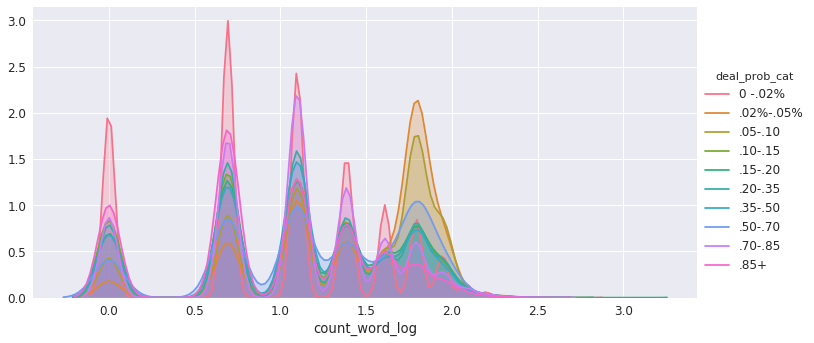

In [149]:
df_train['count_word_log'] = np.log(df_train['count_word'])

(sns
  .FacetGrid(df_train, 
             hue='deal_prob_cat', 
             size=5, aspect=2)
  .map(sns.kdeplot, 'count_word_log', shade=True)
 .add_legend()
)
plt.show()

## Now the description word count by each deal probability categorical

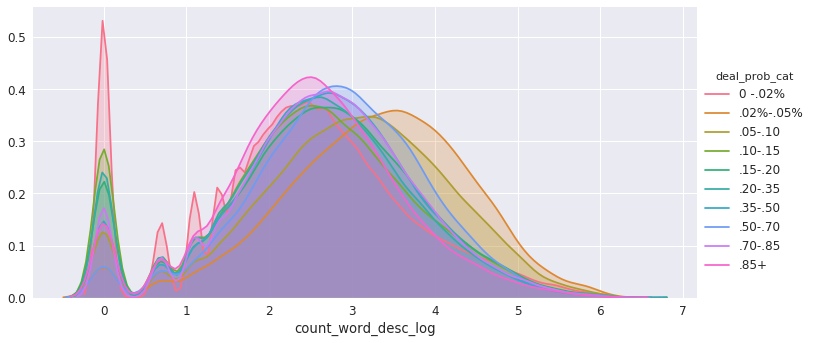

In [150]:
df_train['count_word_desc_log'] = np.log(df_train['count_word_desc'])

(sns
  .FacetGrid(df_train, 
             hue='deal_prob_cat', 
             size=5, aspect=2)
  .map(sns.kdeplot, 'count_word_desc_log', shade=True)
 .add_legend()
)
plt.show()

## Also, let's look the unique words count to title and description.'

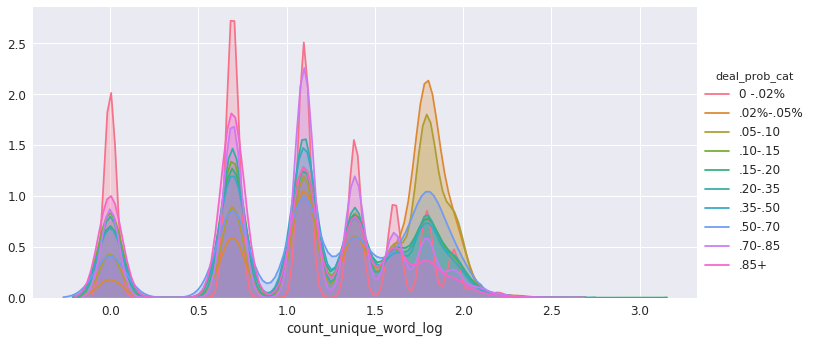

In [151]:
df_train['count_unique_word_log'] = np.log(df_train['count_unique_word'])

(sns
  .FacetGrid(df_train, 
             hue='deal_prob_cat', 
             size=5, aspect=2)
  .map(sns.kdeplot, 'count_unique_word_log', shade=True)
 .add_legend()
)
plt.show()

- Count unique word of description

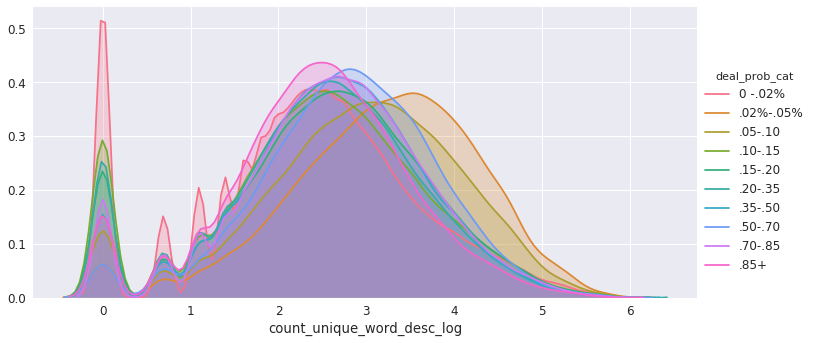

In [152]:
df_train['count_unique_word_desc_log'] = np.log(df_train['count_unique_word_desc'])

(sns
  .FacetGrid(df_train, 
             hue='deal_prob_cat', 
             size=5, aspect=2)
  .map(sns.kdeplot, 'count_unique_word_desc_log', shade=True)
 .add_legend()
)
plt.show()

- We can suppose that the ads with lowest number of unique values have a lower change to be sold. might, it will be an excellent feature to predict the deal probability. I will verify this later.

## Let's explore further the description and title features, because might it can be interesting to our purpose'

In [153]:
title_freq = df_train.title.value_counts()[:35]

#title_freq.index = ["Dress","Shoes","Jacket","Coat","Jeans","Overalls","Sneakers","Costume",
#                    "Boots","Sandals","Skirt","Blouse","Windbreaker","I'll rent one apartment",
#                    "Boots","Wedding Dress","Shirt","A bag","Stroller","Blouse","Sandals","Sofa",
#                    "Pants","Cloak","Ankle Booties","A bike","The plot is 10 hundred. (IZhS)","Sneakers",
#                    "Jacket demi-season","Hire a house","Selling dress","A jacket",
#                    "I'll rent a 2-room apartment","T-shirt","Footwear"]

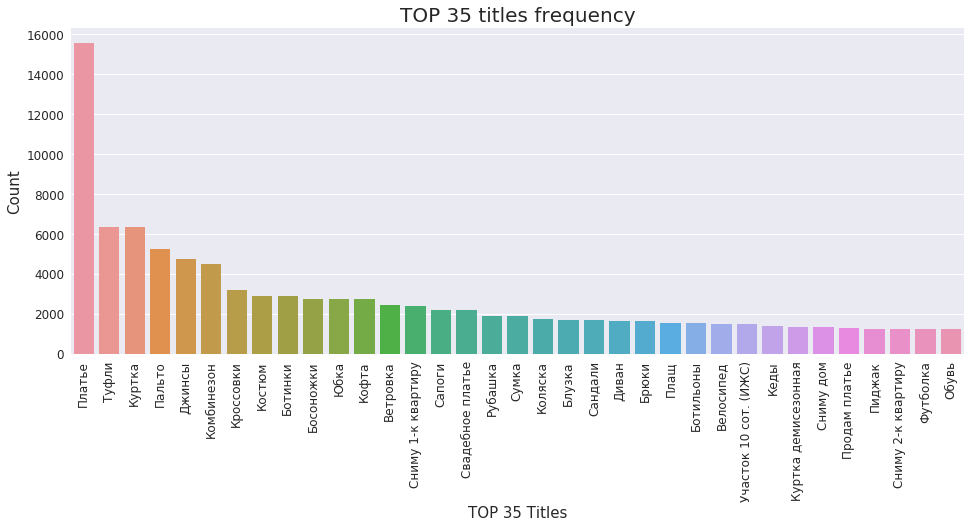

In [154]:
plt.figure(figsize=(16,6))

g = sns.barplot(title_freq.index, title_freq.values)
g.set_xlabel("TOP 35 Titles", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("TOP 35 titles frequency", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

- The top 5 values are: <br>
1 - Dress <br>
2 - Shoes  <br>
3 - Jacket <br>
4 - Coat  <br>
5 - Jeans

## Looking the title by deal probability and Price

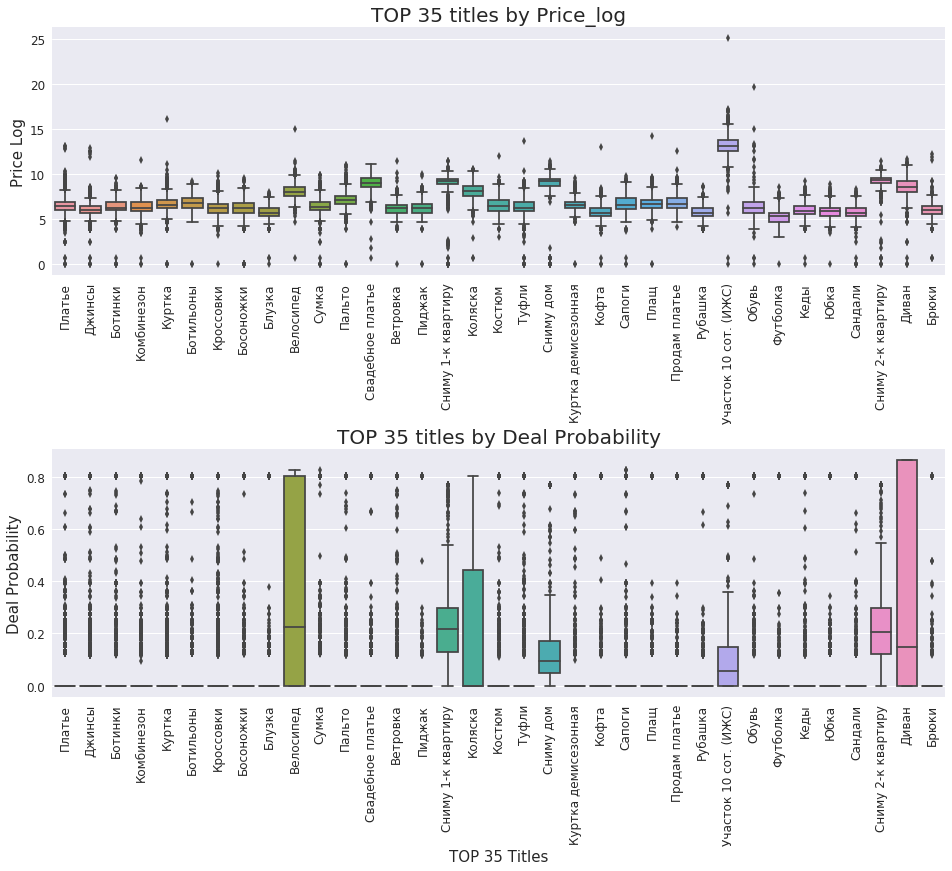

In [155]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='title', y='price_log', 
                data=df_train[df_train.title.isin(title_freq.index.values)])
g.set_xlabel("", fontsize=15)
g.set_ylabel("Price Log", fontsize=15)
g.set_title("TOP 35 titles by Price_log", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='title', y='deal_probability', 
                data=df_train[df_train.title.isin(title_freq.index.values)])
g1.set_xlabel("TOP 35 Titles", fontsize=15)
g1.set_ylabel("Deal Probability", fontsize=15)
g1.set_title("TOP 35 titles by Deal Probability", fontsize=20)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

Very interesting values. We can  verify that we have a clear different prices in same categorys. Also the deal probability. 

In [156]:
cols = ['title','deal_prob_cat']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[df_train.title.isin(title_freq.index.values)][cols[0]], 
            df_train[df_train.title.isin(title_freq.index.values)][cols[1]]).style.background_gradient(cmap = cm)

deal_prob_cat,0 -.02%,.02%-.05%,.05-.10,.10-.15,.15-.20,.20-.35,.35-.50,.50-.70,.70-.85,.85+
title,,,,,,,,,,
Блузка,1560,0,0,57,21,14,1,0,20,0
Босоножки,2517,0,0,96,24,50,6,1,66,0
Ботильоны,1310,0,0,79,22,48,5,1,58,0
Ботинки,2367,0,0,123,49,96,22,8,211,0
Брюки,1530,0,0,47,12,20,5,0,9,0
Велосипед,565,7,83,39,37,112,50,23,580,0
Ветровка,2094,0,0,118,35,59,11,9,106,0
Джинсы,4213,0,0,202,73,104,13,8,145,0
Диван,644,0,121,59,70,143,99,5,17,479


Very cool heat table. I will try convert this names to a better understant.

<h2>Ploting a squarify of Parent Category name and deal probability mean by each category</h2>

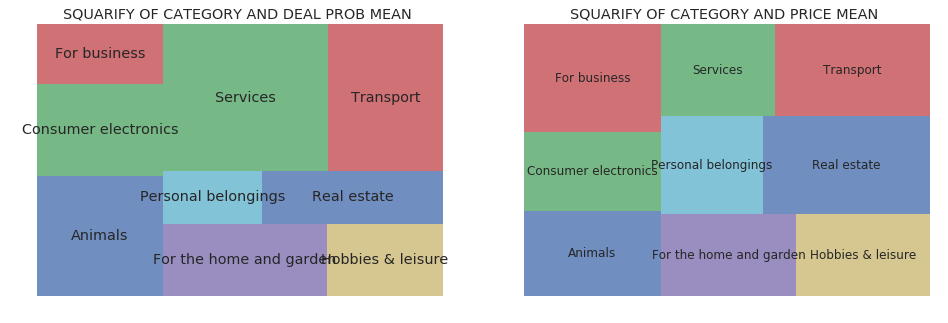

In [157]:
import squarify 

plt.figure(figsize = (16,5)) 

plt.subplot(1,2,1)
grouped_prob_cat = np.log1p(df_train.groupby(['parent_category_name_en']).mean())
grouped_prob_cat['cat'] = grouped_prob_cat.index
current_palette = sns.color_palette()
squarify.plot(sizes = grouped_prob_cat['deal_probability'], \
              label = grouped_prob_cat.index, alpha = 0.8,color = current_palette)
plt.rc('font', size = 12)
plt.axis('off')
plt.title("SQUARIFY OF CATEGORY AND DEAL PROB MEAN ")

plt.subplot(1,2,2)
grouped_prob_cat = np.log1p(df_train.groupby(['parent_category_name_en']).mean())
grouped_prob_cat['cat'] = grouped_prob_cat.index
current_palette = sns.color_palette()
squarify.plot(sizes = grouped_prob_cat['price'], \
              label = grouped_prob_cat.index, alpha = 0.8,color = current_palette)
plt.rc('font', size = 12)
plt.axis('off')
plt.title("SQUARIFY OF CATEGORY AND PRICE MEAN ")
plt.show()

##    Ploting the user_type mean deal probability and mean price by each 

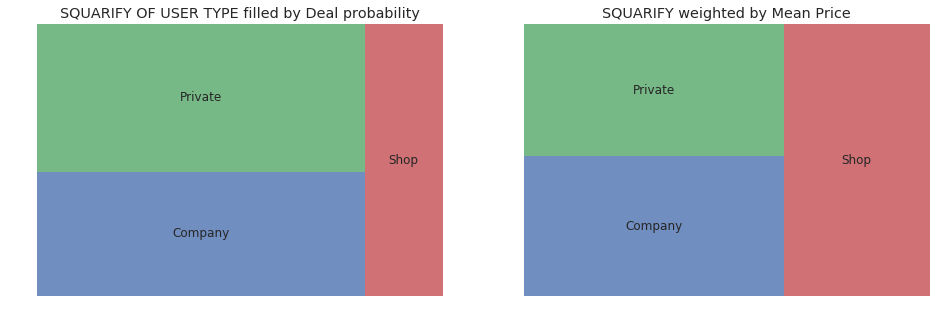

In [158]:
plt.figure(figsize = (16,5)) 

plt.subplot(1,2,1)
grouped_prob_cat = np.log1p(df_train.groupby(['user_type']).mean())
grouped_prob_cat['cat'] = grouped_prob_cat.index
current_palette = sns.color_palette()
squarify.plot(sizes = grouped_prob_cat['deal_probability'].values, 
              label = grouped_prob_cat.index, alpha = 0.8,color = current_palette)
plt.rc('font', size = 12)
plt.axis('off')
plt.title("SQUARIFY OF USER TYPE filled by Deal probability")

plt.subplot(1,2,2)
grouped_prob_cat = np.log1p(df_train.groupby(['user_type']).mean())
grouped_prob_cat['cat'] = grouped_prob_cat.index
current_palette = sns.color_palette()
squarify.plot(sizes = grouped_prob_cat['price'].values, 
              label = grouped_prob_cat.index, alpha = 0.8,color = current_palette)
plt.rc('font', size = 12)
plt.axis('off')
plt.title("SQUARIFY weighted by Mean Price")

plt.show()


I will continue doing this analysis! If you like this kernel, votes up my to keep me motivated =) 